Q1 Implement a 2D convolution function, without padding and stride of 1, which takes a grayscale image and a kernel and returns the feature map.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def convolve2d(image, kernel):
    # get image and kernel dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # calculate dimensions of output feature map
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    # nitialize the output feature map with zeros
    feature_map = np.zeros((output_height, output_width))

    # Convultion Operation
    for i in range(output_height):
        for j in range(output_width):
            # Extract region of interest
            image_slice = image[i : i + kernel_height, j : j + kernel_width]

            # Element-wise multiplication
            product = image_slice * kernel

            # Sum all elements in the product matrix
            feature_map[i, j] = np.sum(product)

    return feature_map

Creating sample image and kernel to be used for image testing.

8 x 8 image created using numpy arrays

Vertical Edge Kernel chosen to highlight edges within the image to make it easier to tell where edges within the image are prominent.

In [2]:
# Creating a sample image for kernel testing
sample_image = np.array([
    [255, 255, 0, 0, 0, 0, 0, 0],
    [255, 255, 0, 0, 0, 0, 0, 0],
    [255, 255, 100, 0, 0, 0, 0, 0],
    [255, 255, 0, 100, 0, 0, 0, 0],
    [255, 255, 0, 0, 100, 0, 0, 0],
    [255, 255, 0, 0, 0, 100, 0, 0],
    [255, 255, 0, 0, 0, 0, 100, 0],
    [255, 255, 0, 0, 0, 0, 0, 100]
], dtype=np.float32)

# Normalize the image
image = sample_image / 255.0

print("--- Sample Image Shape ---")
print(sample_image.shape)

# Vertical Edge Detection Kernel
vertical_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

print("\n--- Kernel Shape ---")
print(vertical_kernel.shape)

--- Sample Image Shape ---
(8, 8)

--- Kernel Shape ---
(3, 3)


Model is ran here and Feature Map image is plotted.


--- Feature Map Shape ---
(6, 6)


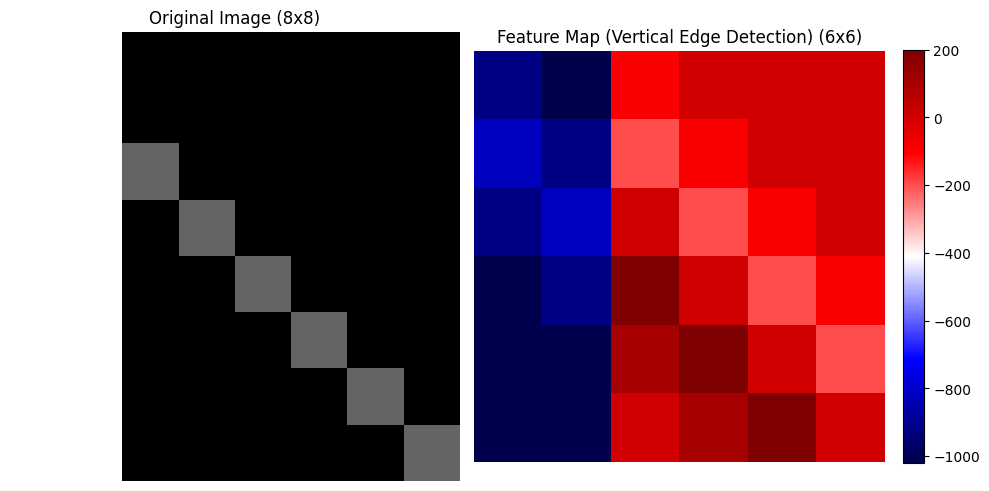

In [3]:
# Running the convolution model
feature_map = convolve2d(sample_image, vertical_kernel)

print("\n--- Feature Map Shape ---")
print(feature_map.shape)

# Displaying results using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
axes[0].imshow(sample_image, cmap='gray')
axes[0].set_title('Original Image (8x8)')
axes[0].axis('off')

# Feature Map
c = axes[1].imshow(feature_map, cmap='seismic', origin='upper')
axes[1].set_title('Feature Map (Vertical Edge Detection) (6x6)')
axes[1].axis('off')

fig.colorbar(c, ax=axes[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()